# Investigating the consistency of annualization of widely used financial statistics

**Note: GitLab fails rendering properly Markdown with Latex in Jupyter Notebook.**

When assessing the financial performance of a specific model (e.g. for virtual bidding), we compute a set of statistical functions based on daily returns.

The most widely used statistical ratios of the **daily return** $r$ are:
- $\mathrm{Sharpe}[r] = \frac{\mathrm{Mean}[r]}{\mathrm{Std}[r]}$
- $\mathrm{CSharpe}_{\alpha}[r] = \frac{\mathrm{Mean}[r]}{\mathrm{CVaR}_{\alpha}[r]}$
- $\mathrm{Sortino}[r] = \frac{\mathrm{Mean}[r]}{\mathrm{StdLeft}[r]}$
- $\mathrm{SortinoSkip}[r] = \frac{\mathrm{Mean}[r]}{\mathrm{StdLeftSkip}[r]}$

where $\mathrm{Mean}$, $\mathrm{Std}$, $\mathrm{CVaR}_{\alpha}$ are the mean, standard deviation and CVaR (with $\alpha$ quantile paramater) statistics, respectively.
For Sortino, two approaches are used when computing the standard deviation of the loss: in the conventional form, non-negative values are set to zero ($\mathrm{StdLeft}$), while in the other form they are simply discarded from the statistics ($\mathrm{StdLeftSkip}$).

It is also typical to provide annualized values of the above ratios when statistics based on daily returns are projected to an entire year.
The standard way is to simply multiply the daily statistics by $\sqrt{365}$:

$\mathrm{Annualized\ Ratio}[r] = \mathrm{Daily\ Ratio}[r] \times \sqrt{365}$.

The annualization approach has the assumption that the daily returns are iid samples from the same distribution.

In this case, the **annual return** $R = \sum \limits_{i=1}^{365} r_{i}$ has the following mean and variance:

- $\mathrm{Mean}[R] = \sum \limits_{i=1}^{365} \mathrm{Mean}[r_{i}] = 365 \times \mathrm{Mean}[r]$
- $\mathrm{Var}[R] = \sum \limits_{i=1}^{365} \mathrm{Var}[r_{i}] = 365 \times \mathrm{Var}[r]$

From the latter, $\mathrm{Std}[R] = \sqrt{\mathrm{Var}[R]} = \sqrt{365} \times \mathrm{Std}[r]$.

Therefore, for Sharpe ratio we can write:

$\mathrm{Sharpe}[R] = \frac{\mathrm{Mean}[R]}{\mathrm{Std}[R]} = \frac{\mathrm{Mean}[r]}{\mathrm{Std}[r]} \times \frac{365}{\sqrt{365}} = \mathrm{Sharpe}[r] \times \sqrt{365}$.

However, while for the $\mathrm{Std}$ the scaling factor for the annualization is in general a good approximation, for other statistics like $\mathrm{CVaR}$, $\mathrm{StdLeft}$ and $\mathrm{StdLeftSkip}$ a similar scaling cannot be proven.

For instance, take $\mathrm{CVaR}_{\alpha}$ and let the daily return have a normal distribbution: $r \sim \mathcal{N}(\mu, \sigma^{2})$.

[In this case](https://en.wikipedia.org/wiki/Expected_shortfall#Normal_distribution), $\mathrm{CVaR}_{\alpha}[r] = -\mu + \sigma C(\alpha)$, where $C(\alpha) = \frac{\varphi(\Phi^{-1}(\alpha))}{\alpha}$ is a constant depending only on the quantile parameter and $\varphi$ and $\Phi$ are the pdf and cdf of the standard normal distribution. It is clear from this expression that even for normal distribution $\mathrm{CVaR}_{\alpha}[R] \ne \mathrm{CVaR}_{\alpha}[r] \times \sqrt{365}$ and therefore $\mathrm{CSharpe}_{\alpha}[R] \ne \mathrm{CSharpe}_{\alpha}[r] \times \sqrt{365}$.
Similarly, using the simple scaling annualization approach for $\mathrm{Sortino}$ or $\mathrm{SortinoSkip}$ can have a very strong bias.

### Daily returns with (approximately) normal distributions

Assuming a normal distribution of daily returns, i.e. $r \sim \mathcal{N}(\mu, \sigma^2)$ we provide below proper annualization of these ratios using the computed estimates of the mean and standard deviation.

First, we can write that $\mathrm{Mean}[R] = 365 \times \mu$ and $\mathrm{Std}[R] = \sqrt{365} \times \mu$.

#### CSharpe
Using the fact that $\mathrm{CVaR}_{\alpha}[R] = -365 \times \mu + \sqrt{365} \times \sigma C(\alpha)$, we can write:

$\mathrm{Sharpe}[R] = \frac{365 \times \mu}{-365 \times \mu + \sqrt{365} \times \sigma C(\alpha)} = \frac{\mu}{\mu + \frac{\sigma C(\alpha)}{\sqrt{365}}}$

#### Sortino
Let $f(r) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(r-\mu)^{2}}{2\sigma^{2}}}$ the pdf of $r$.

Then, we can write: 

$M[r] = \int \limits_{-\infty}^{0} r f(r)dr = \frac{1}{2}\mu \left( \mathrm{erf}\left(-\frac{\mu}{\sqrt{2}\sigma} \right) +1 \right) - \frac{1}{\sqrt{2\pi}}\sigma e^{-\frac{\mu^2}{2\sigma^{2}}}$

$S[r] = \int \limits_{-\infty}^{0} r^2 f(r)dr = \frac{1}{2} (\mu^{2} + \sigma^{2}) \left( \mathrm{erf}\left(-\frac{\mu}{\sqrt{2}\sigma} \right) +1 \right) - \frac{1}{\sqrt{2\pi}}\sigma \mu e^{-\frac{\mu^2}{2\sigma^{2}}}$,

where $\mathrm{erf}$ is the error function.

It is easy to see that $\mathrm{StdLeft}[r] = \sqrt{S[r] - M^{2}[r]}$.
and $\mathrm{StdLeft}[R] = \sqrt{S[R] - M^{2}[R]}$, where $M[R]$ and $S[R]$ are obtained by simply changing $\mu \to 365 \times \mu$ and $\sigma \to \sqrt{365} \times \sigma$ in $M[r]$ and $S[r]$, respectively. The corresponding annualized form of Sortino therefore:

$\mathrm{Sortino}[R] = \frac{365 \times \mu}{\sqrt{S[R] - M^{2}[R]}}$.

Note that due to the form of the $M$ and $S$ statistics, the scaling is highly non-linear.

#### SortinoSkip
In this case, we need a slight modification of the corresponding functions used in Sortino by considering the appropriate normalization constant:

$N[r] = \int \limits_{-\infty}^{0} f(r)dr = \frac{1}{2}\left( \mathrm{erf}\left(-\frac{\mu}{\sqrt{2}\sigma} \right) +1 \right)$.

Similarly, as before, $N[R]$ is obtained by changing $\mu \to 365 \times \mu$ and $\sigma \to \sqrt{365} \times \sigma$ in $N[r]$. The annualized form of SortinoSkip:

$\mathrm{SortinoSkip}[R] = \frac{365 \times \mu}{\sqrt{\frac{S[R]}{N[R]} - \frac{M^{2}[R]}{N^{2}[R]}}}$.

Below, we show numerical experiments with two distributions of daily returns (normal and negative log-normal) to demonstrate the applicability and limitation of the naive and new scaling approaches.

In [1]:
using Pkg
Pkg.activate("./")

  Activating project at `~/GitLab/notebooks/Annualization`


In [2]:
using Distributions
using LinearAlgebra
using PyPlot
using Random
using SpecialFunctions
using Statistics

## Define statistical functions

In [3]:
"""
    Function to compute CVaR (aka expected shortfall) of returns with quantile parameter α (default value of 5%).
"""
function cvar(r::Vector{Float64}, α::Number=0.05)
    @assert 0 < α < 1
    K = Int(floor(length(r) * α)) # number of samples to consider at left tail
    return -mean(partialsort(r, 1:K))
end

"""
    Function to compute std of left tail (i.e. negative values) of returns by considering non-negative values as 0s.
"""
function std_left_zero(r::Vector{Float64})
    return std(map(x -> x > 0 ? 0 : x, r))
end

"""
    Function to compute std of left tail (i.e. negative values) of returns by skipping non-negative values.
"""
function std_left_skip(r::Vector{Float64})
    return std(filter(x -> x < 0, r))
end

"""
    Function to compute Sharpe ratio (i.e. mean / std) of returns.
"""
function Sharpe(r::Vector{Float64})
    return mean(r) / std(r)
end
            
"""
    Function to compute CSharpe ratio (i.e. mean / cvar) of returns with quantile parameter α (default value of 5%).
"""
function CSharpe(r::Vector{Float64}, α::Number=0.05)
    return mean(r) / cvar(r, α)
end
            
"""
Function to compute Sortino ratio (i.e. mean / std of negative side) of returns by setting non-negative values as 0s.
"""
function Sortino(r::Vector{Float64})
    return mean(r) / std_left_zero(r)
end
            
"""
Function to compute Sortino ratio (i.e. mean / std of negative side) of returns by skipping non-negative values.
"""
function SortinoSkip(r::Vector{Float64})
    return mean(r) / std_left_skip(r)
end
;

## Define statistical functions for annualization

In [4]:
"""
Function to compute C(α)
"""
C(α) = pdf(Normal(), quantile(Normal(), α)) / α

"""
Function to compute M(μ, σ)
"""
M(μ, σ) = μ / 2 * (erf(-μ / sqrt(2) / σ) + 1) - 1/sqrt(2π) * σ * exp(-μ^2/2/σ^2)

"""
Function to compute S(μ, σ)
"""
S(μ, σ) = 1/2 * (μ^2 + σ^2) * (erf(-μ / sqrt(2) / σ) + 1) - 1/sqrt(2π) * σ * μ * exp(-μ^2/2/σ^2)

"""
Function to compute N(μ, σ)
"""
N(μ, σ) = 1/2 * (erf(-μ / sqrt(2) / σ) + 1)
;

In [5]:
rng = MersenneTwister(1234)  # random seed for reproducibility

N_years = 100_000             # take a very large sample in order to have accurate annual statistics
;

## 1. Daily returns with normal distribution

Reasonable mean and std parameters taken from [Surfside PnL](https://docs.google.com/spreadsheets/d/1SYMBcus677yyqGinUHLhwQiqhe8LEocC3RFKyRCMmEk/edit?usp=sharing).

In [6]:
μ = 2500.0
σ = 15000.0
d = Normal(μ, σ)
r = rand(rng, d, N_years * 365)
;

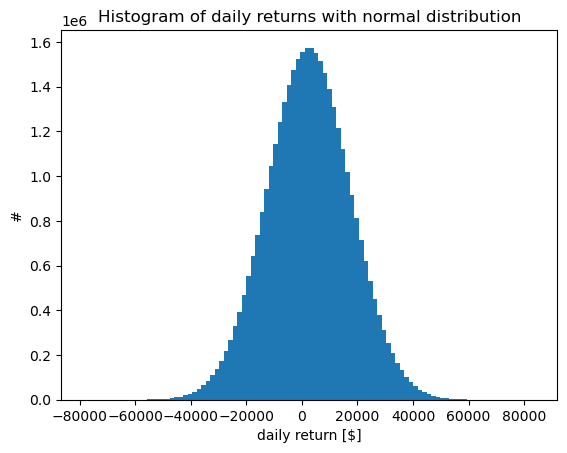

In [7]:
hist(r, 100)
title("Histogram of daily returns with normal distribution")
xlabel("daily return [\$]")
ylabel("#")
;

### Daily ratios

In [8]:
for stat_fun in [Sharpe, CSharpe, Sortino, SortinoSkip]
    println("Daily " * String(Symbol(stat_fun)) * "[r] = ", stat_fun(r))
end

Daily Sharpe[r] = 0.16638693686525186
Daily CSharpe[r] = 0.0877458719708978
Daily Sortino[r] = 0.3159934625608728
Daily SortinoSkip[r] = 0.2902069266184122


### Annualized ratios from daily ones using $\sqrt{365}$ scaling

In [9]:
for stat_fun in [Sharpe, CSharpe, Sortino, SortinoSkip]
    println("Annualized " * String(Symbol(stat_fun)) * "[r] = ", stat_fun(r) * sqrt(365))
end

Annualized Sharpe[r] = 3.178817965404983
Annualized CSharpe[r] = 1.6763825301808692
Annualized Sortino[r] = 6.037046625556369
Annualized SortinoSkip[r] = 5.544395548111275


### Annual ratios from annual returns

In [10]:
R = vec(sum(reshape(r, 365, N_years), dims=1))
for stat_fun in [Sharpe, CSharpe, Sortino, SortinoSkip]
    println("Actual Annual " * String(Symbol(stat_fun)) * "[R] = ", stat_fun(R))
end

Actual Annual Sharpe[R] = 3.177072726220295
Actual Annual CSharpe[R] = -2.8334349485716825
Actual Annual Sortino[R] = 319.3388582375784
Actual Annual SortinoSkip[R] = 10.127031491675567


While the `Annualized` and `Actual Annual` Sharpe ratios are reasonable close to each other, there is a huge discrepancy for the other ratios. In the case of CSharpe, the `Actual Annual` value is negative, which is due to the fact the average of the worst 5% of annual return is actually positive. For conventional Sortino, the discrepancy is more than $\times 50$!

### Annual ratios from daily ones using scaling based on normal distribution assumption

In [11]:
println("Annualized Sharpe[r] = ", Sharpe(r) * sqrt(365))
println("New Annualized CSharpe[r] = ", mean(r) / (-mean(r) + std(r) * C(0.05) / sqrt(365)))
println(
    "New Annualized Sortino[r] = ",
    365 * mean(r) / sqrt(S(365*mean(r), sqrt(365)*std(r)) - M(365*mean(r), sqrt(365)*std(r))^2)
)
println(
    "New Annualized SortinoSkip[r] = ",
    365 * mean(r) / sqrt(S(365*mean(r), sqrt(365)*std(r))/N(365*mean(r), sqrt(365)*std(r))
    - M(365*mean(r), sqrt(365)*std(r))^2 / N(365*mean(r), sqrt(365)*std(r))^2)
)

Annualized Sharpe[r] = 3.178817965404983
New Annualized CSharpe[r] = -2.8481348221640883
New Annualized Sortino[r] = 314.0244094509466
New Annualized SortinoSkip[r] = 12.447128631926645


Using proper scaling for normal distribution leads to pretty good match!

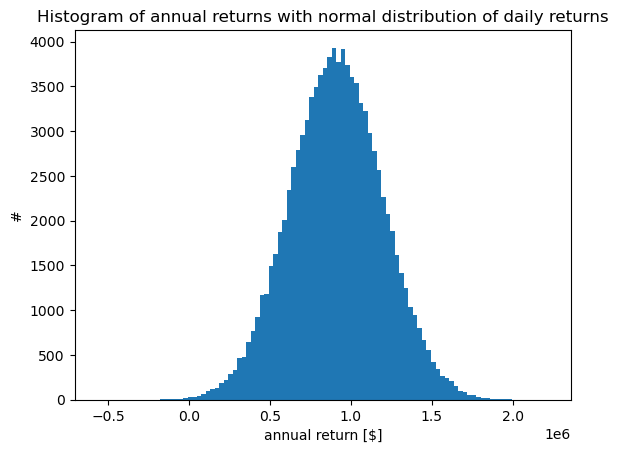

In [12]:
hist(R, 100)
title("Histogram of annual returns with normal distribution of daily returns")
xlabel("annual return [\$]")
ylabel("#")
;

## 2. Daily returns with negative log-normal distribution

Here, we consider a fat-tailed distribution on the negative side.
Again, we want the same mean ($\mu$) and standard deviation ($\sigma$) of the returns, so we set the distribution parameters ($m$ and $s$) accordingly.

In [13]:
m = log(μ) - log(σ^2 / μ^2 + 1) / 2
s = sqrt(2*log(μ) - 2*m)

d = LogNormal(m, s)
r = 2*μ .- rand(rng, d, N_years * 365)
;

Check if mean and std of samples are approximatly as expected:

In [14]:
println("mean = ", mean(r))
println("std = ", std(r))

mean = 2497.8551923344576
std = 15729.837017056789


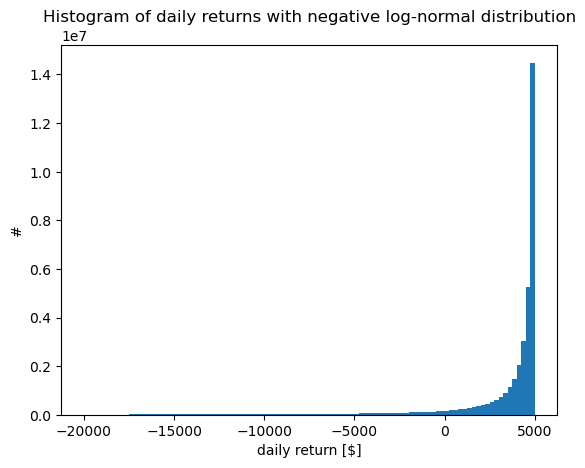

In [15]:
hist(r, 100, (-20000, 5000))
title("Histogram of daily returns with negative log-normal distribution")
xlabel("daily return [\$]")
ylabel("#")
;

### Daily ratios

In [16]:
for stat_fun in [Sharpe, CSharpe, Sortino, SortinoSkip]
    println("Daily " * String(Symbol(stat_fun)) * "[r] = ", stat_fun(r))
end

Daily Sharpe[r] = 0.1587972710477474
Daily CSharpe[r] = 0.09957294896714718
Daily Sortino[r] = 0.16303544924905813
Daily SortinoSkip[r] = 0.0519710237046161


### Annualized ratios from daily ones using $\sqrt{365}$ scaling

In [17]:
for stat_fun in [Sharpe, CSharpe, Sortino, SortinoSkip]
    println("Annualized " * String(Symbol(stat_fun)) * "[r] = ", stat_fun(r) * sqrt(365))
end

Annualized Sharpe[r] = 3.033817603557816
Annualized CSharpe[r] = 1.902338518927466
Annualized Sortino[r] = 3.1147878844027894
Annualized SortinoSkip[r] = 0.9929050137302186


### Annual ratios from annual returns

In [18]:
R = vec(sum(reshape(r, 365, N_years), dims=1))
for stat_fun in [Sharpe, CSharpe, Sortino, SortinoSkip]
    println("Actual Annual " * String(Symbol(stat_fun)) * "[R] = ", stat_fun(R))
end

Actual Annual Sharpe[R] = 3.028430578780993
Actual Annual CSharpe[R] = -8.786765737148878
Actual Annual Sortino[R] = 5.974102532990139
Actual Annual SortinoSkip[R] = 0.68810828078345


Again, the `Annualized` and `Actual Annual` Sharpe ratios show a good match but we have a significant discrepancy for CSharpe and conventional Sortino!

### Annual ratios from daily ones using scaling based on normal distribution assumption

In [19]:
println("Annualized Sharpe[r] = ", Sharpe(r) * sqrt(365))
println("New Annualized CSharpe[r] = ", mean(r) / (-mean(r) + std(r) * C(0.05) / sqrt(365)))
println(
    "New Annualized Sortino[r] = ",
    365 * mean(r) / sqrt(S(365*mean(r), sqrt(365)*std(r)) - M(365*mean(r), sqrt(365)*std(r))^2)
)
println(
    "New Annualized SortinoSkip[r] = ",
    365 * mean(r) / sqrt(S(365*mean(r), sqrt(365)*std(r))/N(365*mean(r), sqrt(365)*std(r))
    - M(365*mean(r), sqrt(365)*std(r))^2 / N(365*mean(r), sqrt(365)*std(r))^2)
)

Annualized Sharpe[r] = 3.033817603557816
New Annualized CSharpe[r] = -3.1240887861915065
New Annualized Sortino[r] = 226.78276819166803
New Annualized SortinoSkip[r] = 11.507457386459379


The above results clearly demonstrate the limitation of the assumption of normal distribution if the daily return has a very different (skewed) distribution.

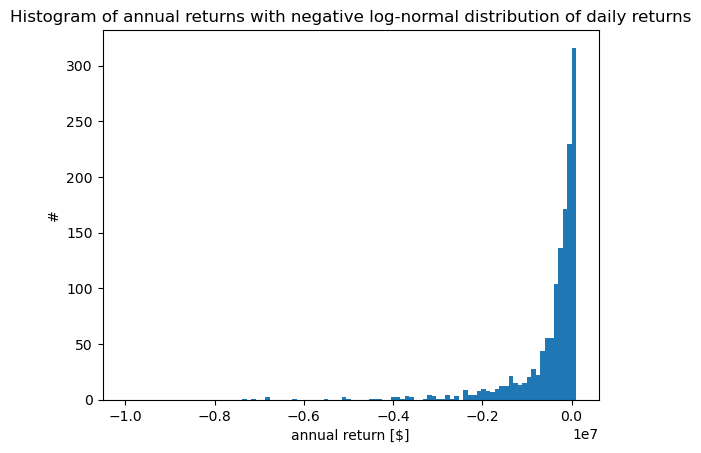

In [20]:
hist(R, 100, (-10_000_000, 100_000))
title("Histogram of annual returns with negative log-normal distribution of daily returns")
xlabel("annual return [\$]")
ylabel("#")
;